In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import IBMQ, Aer, transpile, assemble
from qiskit.visualization import plot_histogram, plot_bloch_multivector, array_to_latex
from qiskit import *
from qiskit import execute
#from qiskit.providers.ibmq import least_busy
import numpy as np
from numpy.random import randint
from qiskit.tools.visualization import circuit_drawer
import matplotlib.pyplot as plt
import math
from qiskit.circuit.library import RXGate,HGate
from qiskit.circuit.library.generalized_gates.mcmt import MCMTVChain,MCMT

In [2]:
#Grover gate
grover2 = QuantumCircuit(2)
grover2.h([0,1])
grover2.z([0,1])
grover2.cz(0,1)
grover2.h([0,1])

Grover2 = grover2.to_gate(label = 'Grover')

In [3]:
#ccz
cir = QuantumCircuit(4)
cir = MCMT('cz',2,1)

ccz = cir.to_gate(label = 'ccz')

In [4]:
#cGrover gate
cgrover2 = QuantumCircuit(3)
cgrover2.ch(2,[0,1])
cgrover2.cz(2,[0,1])
cgrover2.append(ccz,[2,0,1])
cgrover2.ch(2,[0,1])

cGrover2 = cgrover2.to_gate(label = 'Controlled Grover')

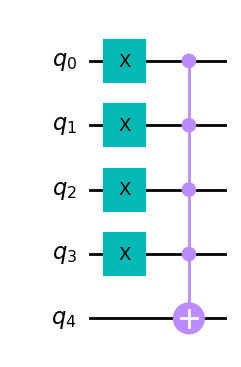

In [5]:
#Oracle
oracle = QuantumCircuit(5)
oracle.x([0,1,2,3])
oracle.mcx([0,1,2,3],4)
oracle.draw()

Oracle = oracle.to_gate(label = 'Oracle')
oracle.draw(output="mpl")

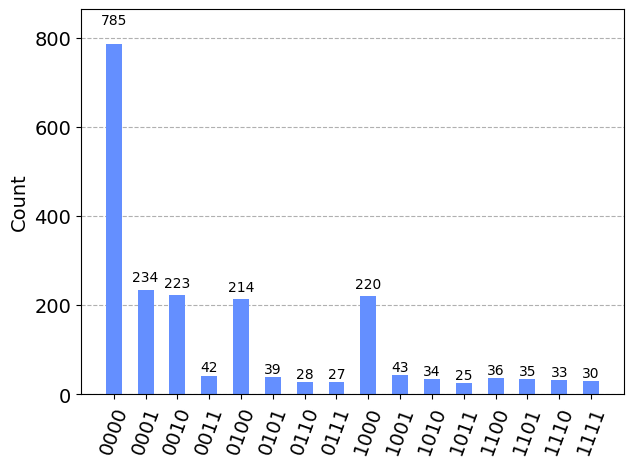

In [6]:
#Step 1 skw circuit
import math
n=4
nodeq = QuantumRegister(4, 'node')
coinq = QuantumRegister(2, 'coin')
redundantq = QuantumRegister(1, 'ancilla')
mclass = ClassicalRegister(4, 'c')
skw_circuit=QuantumCircuit(nodeq,coinq,redundantq,mclass)
skw_circuit.h(range(n+2))
skw_circuit.barrier()

#Shift
def shift_operator(circuit):
    for i in range(0,4):
        circuit.x(4)
        if i%2==0:
            circuit.x(5)
        circuit.ccx(4,5,i)

for iteration in range(5): 
    #O
    skw_circuit.append(Oracle,[0,1,2,3,6])
    skw_circuit.barrier()
    #G
    skw_circuit.x(6)
    skw_circuit.append(cGrover2,[4,5,6])
    skw_circuit.x(6)
    skw_circuit.barrier()
    #C1
    skw_circuit.crx(2*np.pi,6,4)
    skw_circuit.barrier()
    #O.inverse
    skw_circuit.append(Oracle.inverse(),[0,1,2,3,6])
    skw_circuit.barrier()
    
    #Shift
    shift_operator(skw_circuit)
    skw_circuit.barrier()
skw_circuit.measure(nodeq[0],mclass[0])
skw_circuit.measure(nodeq[1],mclass[1])
skw_circuit.measure(nodeq[2],mclass[2])
skw_circuit.measure(nodeq[3],mclass[3])
skw_circuit.draw(output="mpl")

simulator = Aer.get_backend('qasm_simulator')
job = execute(skw_circuit, simulator, shots = 2048)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

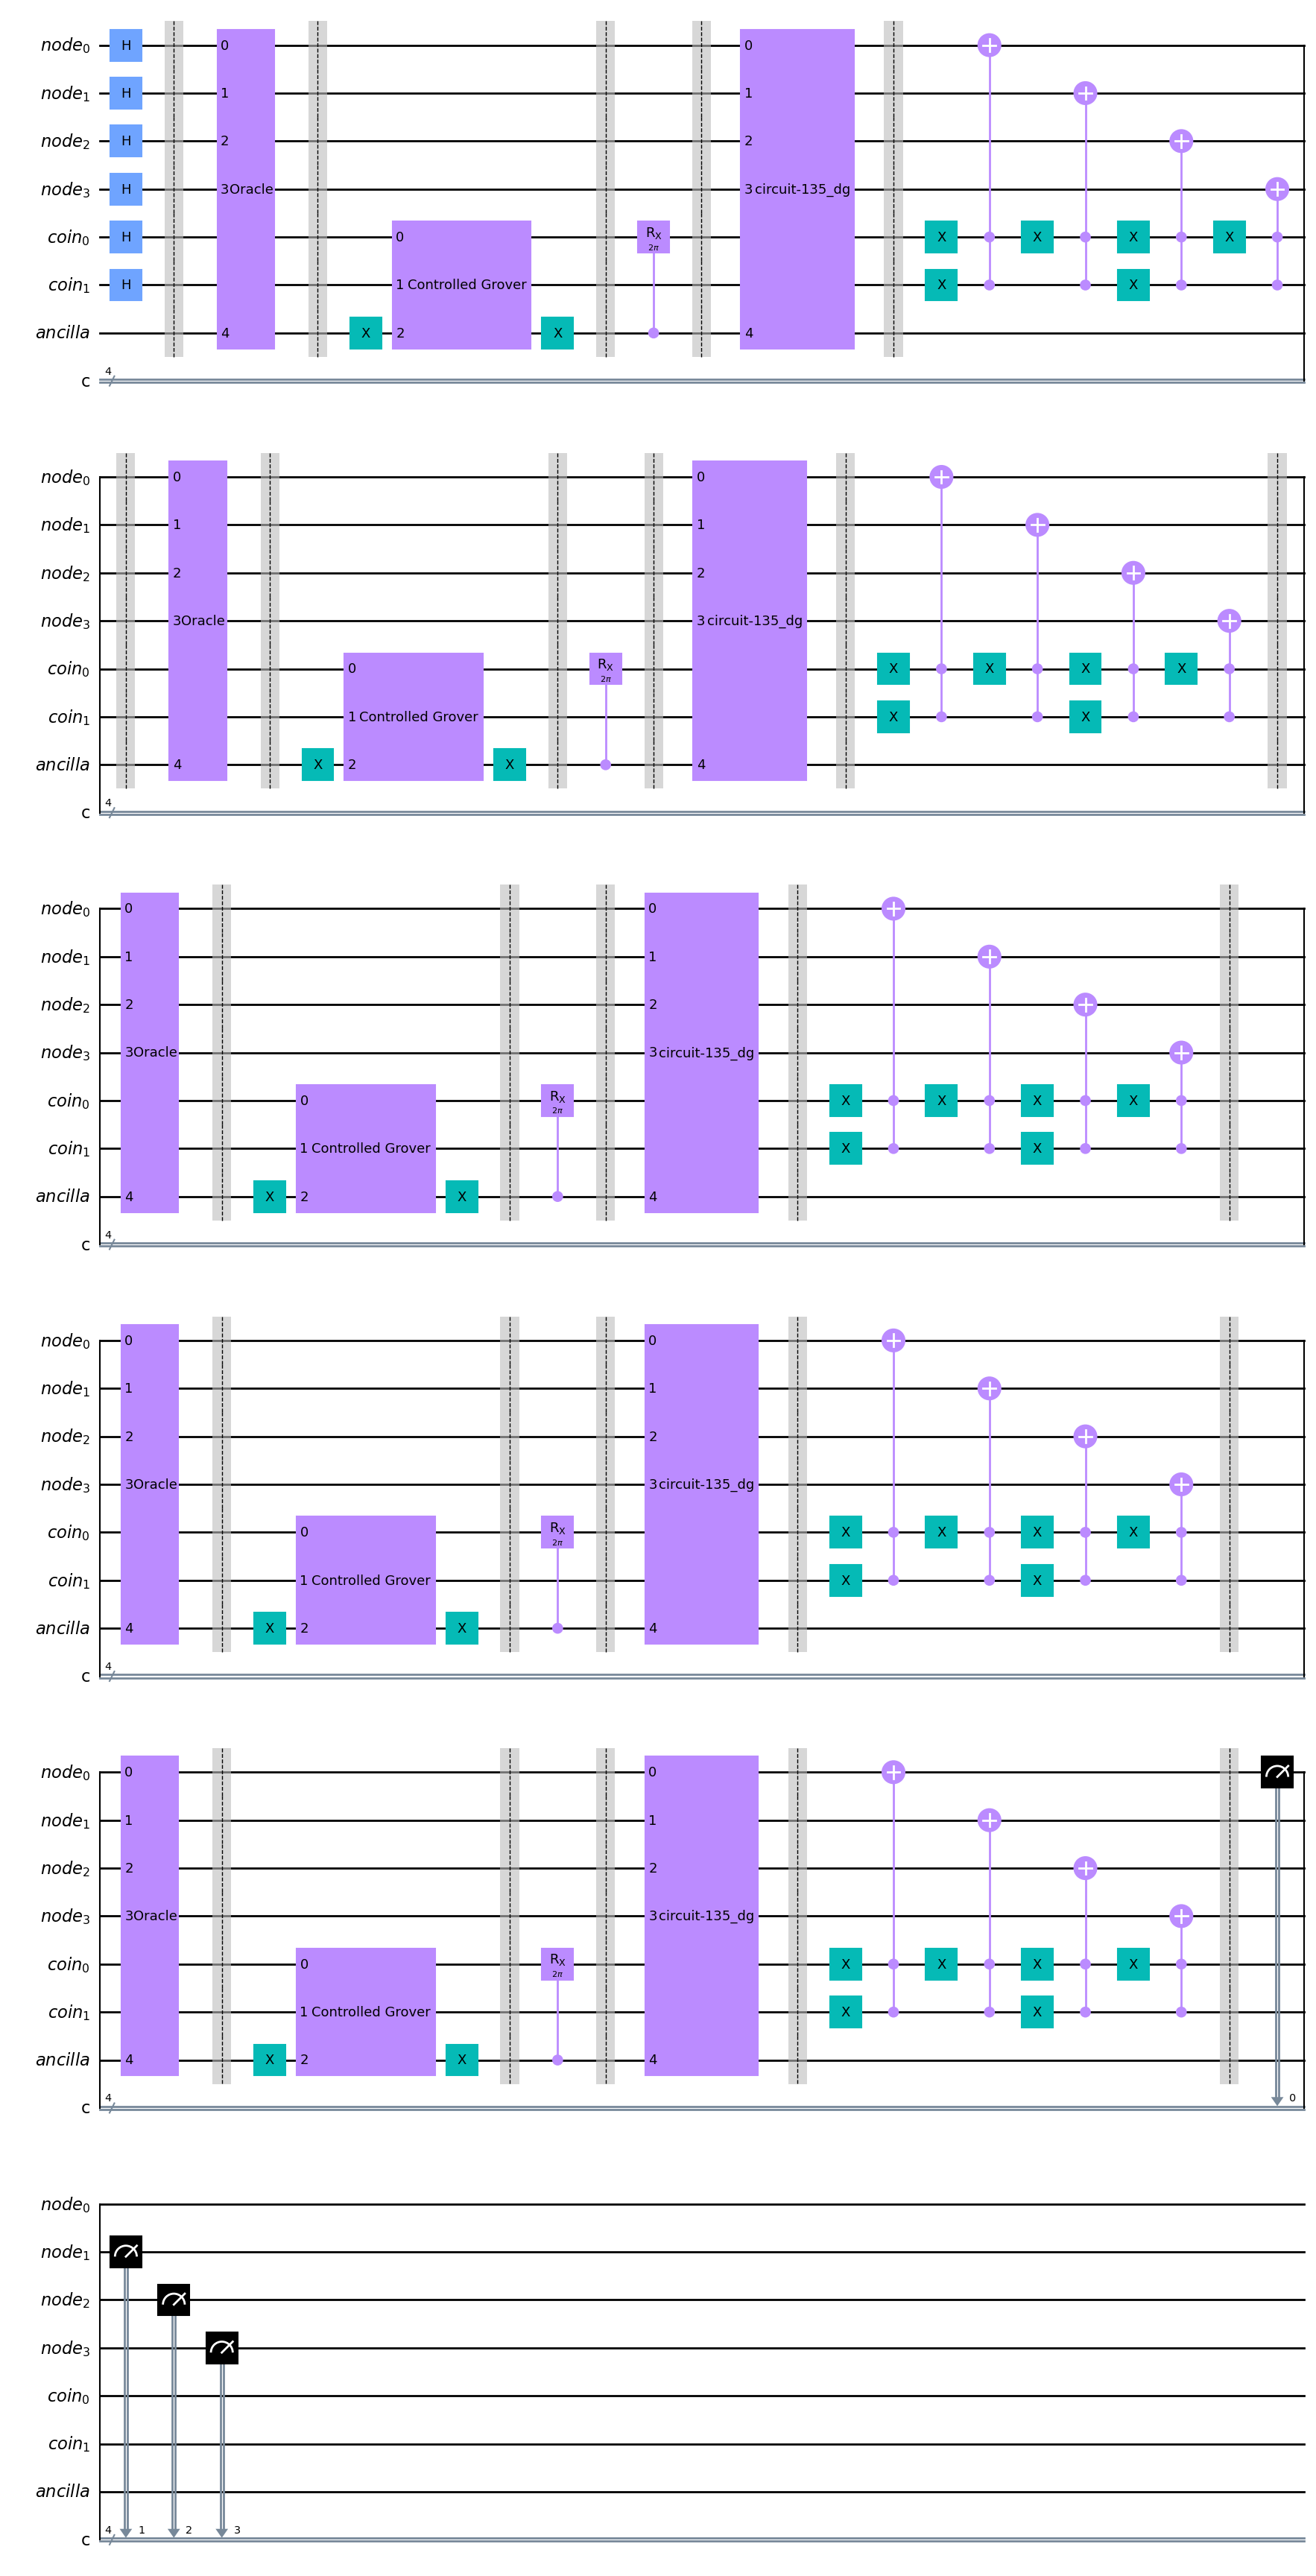

In [7]:
skw_circuit.draw(output="mpl")

In [13]:
!sh ~/projects/quantum_walk/run_on.sh 


CommandNotFoundError: Your shell has not been properly configured to use 'conda activate'.
To initialize your shell, run

    $ conda init <SHELL_NAME>

Currently supported shells are:
  - bash
  - fish
  - tcsh
  - xonsh
  - zsh
  - powershell

See 'conda init --help' for more information and options.

IMPORTANT: You may need to close and restart your shell after running 'conda init'.




In [11]:
!sh ~/projects/quantum_walk/run_on.sh 


CommandNotFoundError: Your shell has not been properly configured to use 'conda activate'.
To initialize your shell, run

    $ conda init <SHELL_NAME>

Currently supported shells are:
  - bash
  - fish
  - tcsh
  - xonsh
  - zsh
  - powershell

See 'conda init --help' for more information and options.

IMPORTANT: You may need to close and restart your shell after running 'conda init'.


